In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
# Run Multicolinaryty 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [2]:
#df = pd.read_csv('df_clean.csv')
df = pd.read_csv('df_clean_v2.csv')

In [3]:
# If we choose to put the datetime index the pairplot will not work because of the duplicated dates. 
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

# Correlation analysis 
* Some values are very correlated and others are not
* We can see that more the team as a low rank more the overall scores are low 
* When scores are high/low in some categories it tends to be high on the others two 
* We get a confirmation than the away_team_score is negatively correlate on the result 

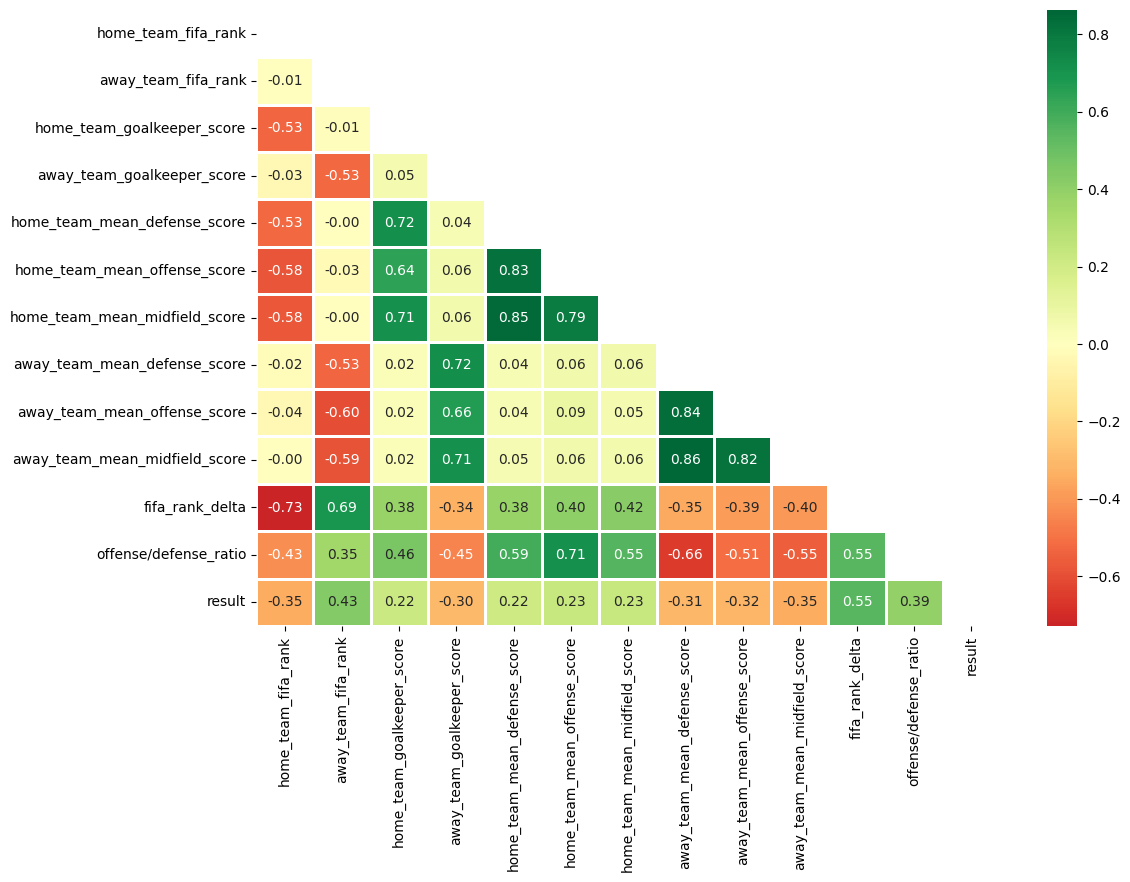

In [4]:
# Create the correlation matrix
corr_mean = df.corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(12,8)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_yticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [6]:
#
#sns.set_theme(style="ticks")

#a = sns.pairplot(df, kind="kde")

In [8]:
df.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,fifa_rank_delta,offense/defense_ratio,result
date,,,,,,,,,,,,,,,
1993-08-08,Ecuador,Venezuela,35,94,71.645833,69.000000,70.475926,75.477083,74.929167,71.669231,75.260000,74.592308,59,1.053131,2
1993-08-15,Uruguay,Brazil,22,8,79.215190,87.596154,79.593671,83.616456,78.277215,86.150000,87.326923,85.873077,-14,0.970591,1
1993-08-25,Denmark,Lithuania,10,84,80.428571,76.000000,78.645714,77.640000,79.231429,62.080000,64.566667,66.000000,74,1.250644,2
1993-08-29,Argentina,Paraguay,5,67,80.960000,74.157895,83.172000,88.237333,84.616000,74.773684,77.610526,74.326316,62,1.180059,1
1993-09-05,Argentina,Colombia,5,19,80.960000,77.772727,83.172000,88.237333,84.616000,78.536364,80.663636,78.204545,14,1.123522,0


In [8]:
# Conversion des pays en numériques
le = preprocessing.LabelEncoder()
df['home_team'] = le.fit_transform(df['home_team'])
df['away_team'] = le.fit_transform(df['away_team'])


In [9]:

#df['home_team']  = pd.get_dummies(df['home_team'])
#df['away_team'] = pd.get_dummies(df['away_team'])

In [10]:
# Countries mapping / Important for our webapp 
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Albania': 0, 'Algeria': 1, 'American Samoa': 2, 'Andorra': 3, 'Angola': 4, 'Antigua and Barbuda': 5, 'Argentina': 6, 'Armenia': 7, 'Australia': 8, 'Austria': 9, 'Azerbaijan': 10, 'Bahrain': 11, 'Bangladesh': 12, 'Barbados': 13, 'Belarus': 14, 'Belgium': 15, 'Belize': 16, 'Benin': 17, 'Bermuda': 18, 'Bhutan': 19, 'Bolivia': 20, 'Bosnia and Herzegovina': 21, 'Botswana': 22, 'Brazil': 23, 'Bulgaria': 24, 'Burkina Faso': 25, 'Burundi': 26, 'Cabo Verde': 27, 'Cambodia': 28, 'Cameroon': 29, 'Canada': 30, 'Chile': 31, 'China PR': 32, 'Chinese Taipei': 33, 'Colombia': 34, 'Comoros': 35, 'Congo': 36, 'Congo DR': 37, 'Costa Rica': 38, 'Croatia': 39, 'Cuba': 40, 'Cyprus': 41, 'Czech Republic': 42, "Côte d'Ivoire": 43, 'Denmark': 44, 'Ecuador': 45, 'Egypt': 46, 'El Salvador': 47, 'England': 48, 'Equatorial Guinea': 49, 'Estonia': 50, 'Ethiopia': 51, 'Faroe Islands': 52, 'Fiji': 53, 'Finland': 54, 'France': 55, 'Gabon': 56, 'Gambia': 57, 'Georgia': 58, 'Germany': 59, 'Ghana': 60, 'Gibraltar': 61,

## Vif Analysis
* It apperars to have 3 columns over Vif>5 , we should remove it 

In [11]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

variance_inflation_factors(df)

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_11672\167995668.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  [1 / (1. - OLS(exog_df[col].values,


const                            1.299061e+04
home_team                        1.027112e+00
away_team                        1.041358e+00
home_team_fifa_rank                       inf
away_team_fifa_rank                       inf
home_team_goalkeeper_score       2.335956e+00
away_team_goalkeeper_score       2.341737e+00
home_team_mean_defense_score     4.988130e+00
home_team_mean_offense_score     8.073664e+01
home_team_mean_midfield_score    4.425942e+00
away_team_mean_defense_score     8.224396e+01
away_team_mean_offense_score     4.178239e+00
away_team_mean_midfield_score    4.945977e+00
fifa_rank_delta                           inf
offense/defense_ratio            1.378232e+02
result                           1.488329e+00
Name: VIF, dtype: float64

In [27]:
df.to_csv('df_for_ML_v2.csv', encoding='utf-8', index=True)

#### df.to_csv('df_for_ML.csv', encoding='utf-8', index=True)

In [39]:
#df.to_csv('df_for_ML.csv', encoding='utf-8', index=True)
dfnotnumeric = df
dfnotnumeric.to_csv('df_for_ML_countries_not_numeric_v2.csv', encoding='utf-8', index=True)

In [41]:
dfnotnumeric

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,fifa_rank_delta,offense/defense_ratio,result
date,,,,,,,,,,,,,,,
1993-08-08,Ecuador,Venezuela,35,94,71.645833,69.000000,70.475926,75.477083,74.929167,71.669231,75.260000,74.592308,59,1.053131,2
1993-08-15,Uruguay,Brazil,22,8,79.215190,87.596154,79.593671,83.616456,78.277215,86.150000,87.326923,85.873077,-14,0.970591,1
1993-08-25,Denmark,Lithuania,10,84,80.428571,76.000000,78.645714,77.640000,79.231429,62.080000,64.566667,66.000000,74,1.250644,2
1993-08-29,Argentina,Paraguay,5,67,80.960000,74.157895,83.172000,88.237333,84.616000,74.773684,77.610526,74.326316,62,1.180059,1
1993-09-05,Argentina,Colombia,5,19,80.960000,77.772727,83.172000,88.237333,84.616000,78.536364,80.663636,78.204545,14,1.123522,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29,Saudi Arabia,Australia,53,37,70.000000,77.000000,72.800000,67.700000,72.800000,72.000000,72.300000,73.500000,-16,0.940278,2
2022-03-29,Ecuador,Argentina,44,4,71.000000,84.000000,73.500000,76.000000,74.500000,82.200000,89.000000,84.000000,-40,0.924574,1
2022-03-29,Bolivia,Brazil,76,2,70.000000,89.000000,68.800000,68.300000,68.800000,84.800000,86.300000,85.500000,-74,0.805425,0
